In [1]:
import scipy
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import particles

In [4]:
%matplotlib inline

In [5]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [6]:
low_time=350
time_limit_ix = 818 

In [7]:
micro = 10**-6

In [8]:
def stokes_einstein(dp, T=298):
    kB = 1.38064852*10**-23
    d = (kB*T)/(3*np.pi*0.0001*dp)
    return d

# X-direction

In [11]:
data_direction_2x = '/Users/georgepamfilis/Desktop/THESIS/comsol_project/DATA/micromodel/data_v1/m2x/'
data_direction_1x = '/Users/georgepamfilis/Desktop/THESIS/comsol_project/DATA/micromodel/data_v1/m1x/'

In [12]:
files_2x = [data_direction_2x+f for f in os.listdir(data_direction_1x)]
files_1x = [data_direction_1x+f for f in os.listdir(data_direction_1x)]

In [13]:
diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files_1x]
diameters

['1000', '1250', '1500', '1750', '2000', '250', '500', '750']

In [23]:
sigma_x2 = []
for f in range(len(files_2x)):
    m2x = pd.read_csv(files_2x[f], index_col=0).mean(axis=1)
    m1x = pd.read_csv(files_1x[f], index_col=0).mean(axis=1)
    sigma_x2.append(m2x-m1x**2)

In [56]:
time = sigma_x2[0].index
df = pd.DataFrame(np.array(sigma_x2).T, columns=diameters, index=time)
da = df[[d for d in df.columns if '250'!=d]]
da = da[[d for d in da.columns if '1250'!=d]]
da = da.reindex(da.columns.astype(int).sort_values().astype(str), axis=1)

In [57]:
da.head(n=10)

,500,750,1000,1500,1750,2000
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,4.769642e-07,7.160819e-08,2.928186e-08,2.251214e-07,2.306386e-07,1.814635e-07
4,3.666015e-07,2.138166e-07,6.083534e-08,8.081135e-07,2.450082e-07,6.969053e-07
6,5.909221e-07,2.267595e-07,1.894361e-07,2.122098e-07,1.690147e-07,1.706479e-06
8,2.713661e-07,1.938948e-07,7.919179e-08,5.131532e-08,6.997240e-07,3.113537e-07
10,8.742632e-07,1.381092e-07,3.028630e-07,2.082983e-07,2.078822e-03,3.506483e-07
12,1.247284e-06,2.369203e-07,9.206122e-07,3.484317e-07,1.072385e-01,3.348330e-06
14,8.467019e-07,1.695217e-07,5.820948e-08,6.347566e-08,8.560048e-02,1.381585e-06
16,9.783121e-06,9.873438e-08,3.846996e-07,1.179788e-06,2.179029e-02,5.147170e-08
18,2.326830e-04,3.271326e-06,1.973385e-06,1.229300e-06,2.442623e-02,6.088710e-06


0.985543843616
0.99979654234
0.99936109179
0.99924139983
0.999171884803
0.999773596085


Text(0.5,1,u'Spatial Variance: x-direction')

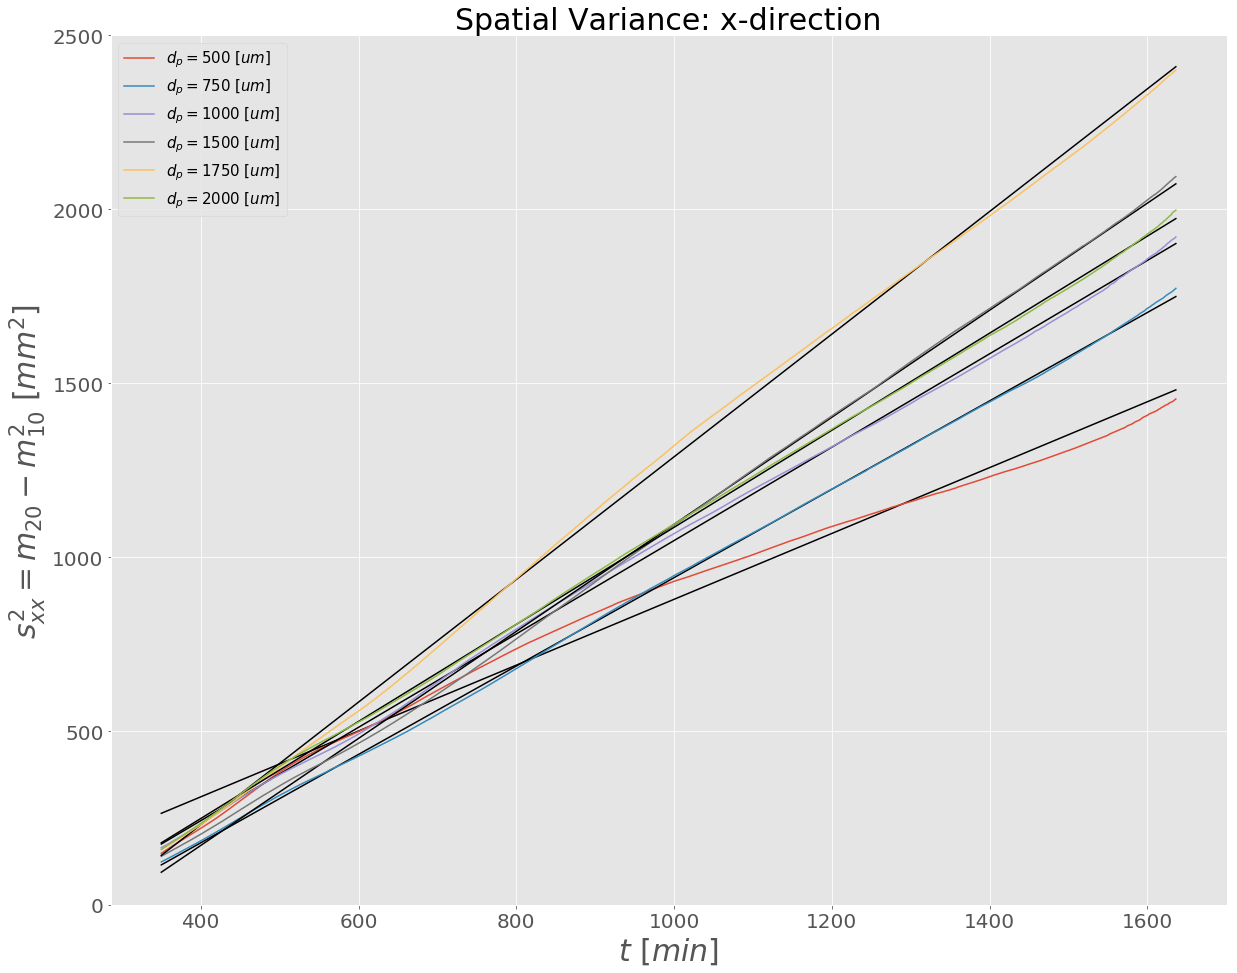

In [58]:
fig, ax = plt.subplots()
data = da.loc[low_time:da.index[time_limit_ix]]
fitting = []
for i in da.columns:
    y = data[i]
    x = data.index
    fit = np.polyfit(x, y, deg=1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
    print(r_value**2)
    ax.plot(x, slope * x +intercept, color='black')
    ax.plot(x,y,label=r'$d_p=$'+i+r' $[um]$')
    fitting.append([slope, intercept])
plt.legend(fontsize=15)
ymin=0
ymax=2500
xmin=0.0
xmax=1800
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin,ymax)
plt.xlabel(r'$t$ $[min]$', fontsize=30)
plt.ylabel(r'$s^{2}_{xx}=m_{20}-m_{10}^2$ $[mm^2]$', fontsize=30)
plt.title('Spatial Variance: x-direction', fontsize=30)

In [59]:
params = np.array(fitting)
params[:,0] = params[:,0]/2
params

array([[  4.73214560e-01,  -6.72227258e+01],
       [  6.35141598e-01,  -3.28809510e+02],
       [  6.71067691e-01,  -2.94049387e+02],
       [  7.69306427e-01,  -4.43815835e+02],
       [  8.81412181e-01,  -4.73980635e+02],
       [  6.97586193e-01,  -3.09046701e+02]])

Text(500,0.8,u'$D_{xx}$$=0.000180556399938*d_p+0.462259275308$')

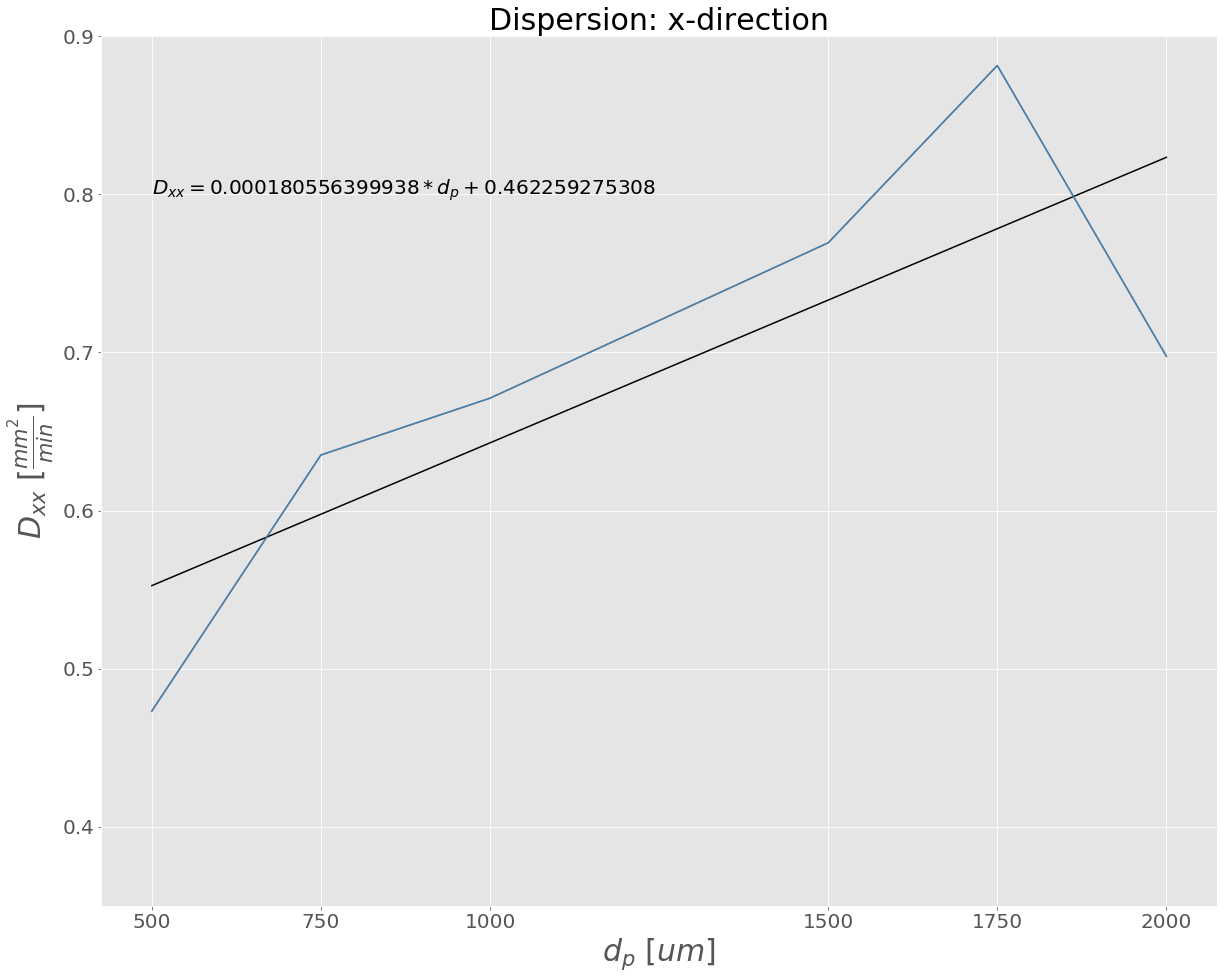

In [60]:
fig, ax = plt.subplots()
x = data.columns.astype(int)
y = params[:,0]
plt.plot(x, y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
plt.plot(x, slope * x +intercept, color='black')
plt.plot(x,y)
plt.legend(fontsize=15)
ymin=0.35
ymax=.9
plt.ylim(ymin,ymax)
plt.xticks(x)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r'$D_{xx}$ $[\frac{mm^2}{min}]$', fontsize=30)
plt.xlabel(r'$d_p$ $[um]$', fontsize=30)
plt.title('Dispersion: x-direction', fontsize=30)
plt.text(500, 0.8, r'$D_{xx}$'+'$={0}*d_p+{1}$'.format(slope,intercept), fontsize=20)

Text(0.5,1,u'Dispersivity: x-direction')

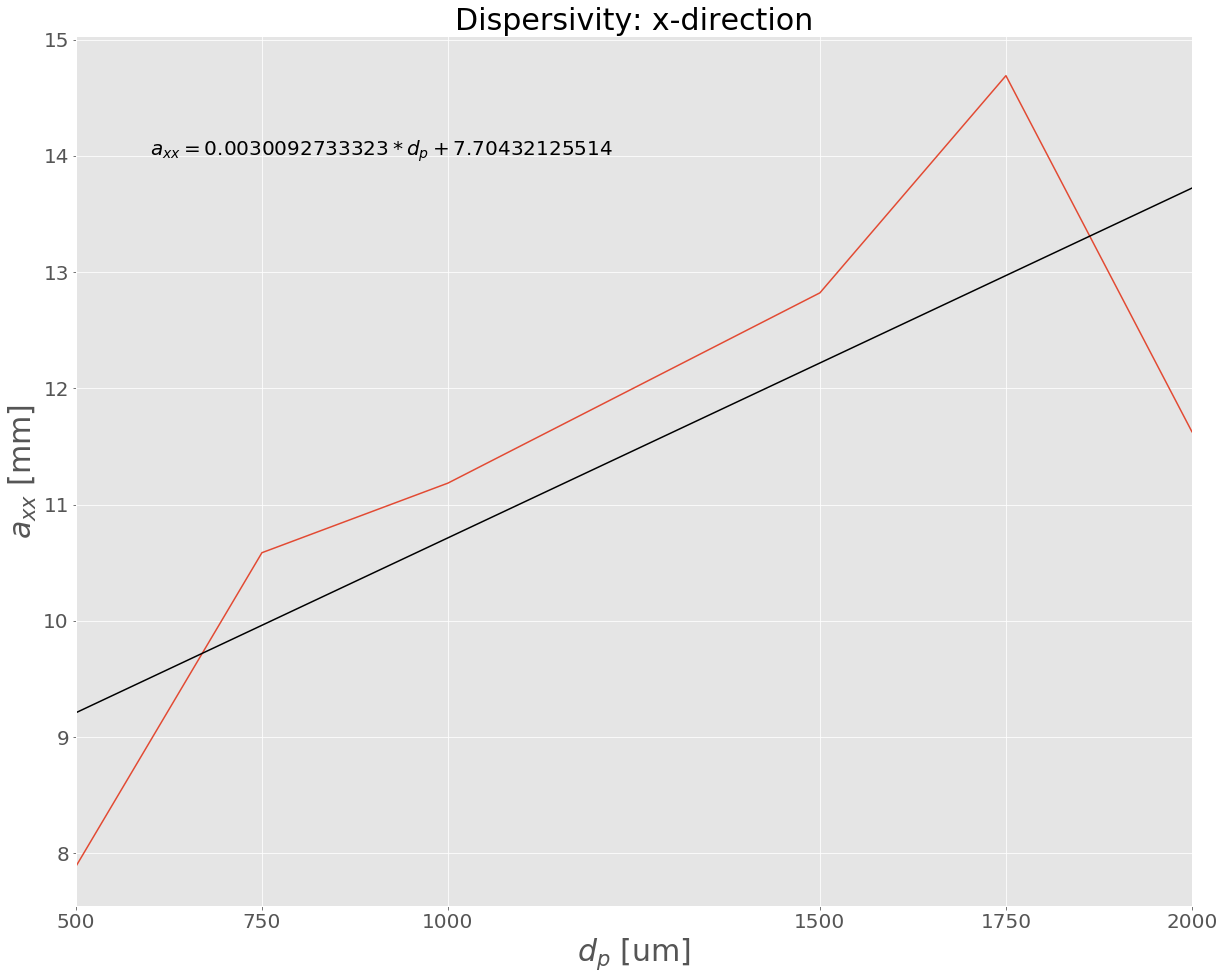

In [61]:
diff = params[:,0] - stokes_einstein(x*micro)
v_av_meters_second =  0.000001 # m/s 
n=1
v_av_millimeters_minite = v_av_meters_second*60*1000
a_x = diff/(v_av_millimeters_minite)**n

fig, ax = plt.subplots()
sns.tsplot(data=a_x,time=x, err_style="ci_bars")
fit = np.polyfit(x, a_x, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
plt.text(600, 14, r'$a_{xx}=$'+r'${0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel(r'$d_p$ [um]', fontsize=30)
plt.ylabel(r'$a_{xx}$ [mm]', fontsize=30)
plt.xticks(x);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Dispersivity: x-direction', fontsize=30)

# y direction

In [62]:
data_direction_2y = '/Users/georgepamfilis/Desktop/THESIS/comsol_project/DATA/micromodel/data_v1/m2y/'
data_direction_1y = '/Users/georgepamfilis/Desktop/THESIS/comsol_project/DATA/micromodel/data_v1/m1y/'

files_2y = [data_direction_2y+f for f in os.listdir(data_direction_1y)]
files_1y = [data_direction_1y+f for f in os.listdir(data_direction_1y)]

diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files_1y]
diameters

sigma_y2 = []
for f in range(len(files_2y)):
    m2y = pd.read_csv(files_2y[f], index_col=0).mean(axis=1)
    m1y = pd.read_csv(files_1y[f], index_col=0).mean(axis=1)
    sigma_y2.append(m2y-m1y**2)

In [63]:
time = sigma_y2[0].index
df = pd.DataFrame(np.array(sigma_y2).T, columns=diameters, index=time)
da = df[[d for d in df.columns if '250'!=d]]
da = da[[d for d in da.columns if '1250'!=d]]
da = da.reindex(da.columns.astype(int).sort_values().astype(str), axis=1)

('500', 0.0033996434358358322, 0.98788100269070855)
('750', 0.0034560589688403557, 0.98759887851722172)
('1000', 0.003653062229134568, 0.97463875519801768)
('1500', 0.0034359141188542879, 0.98428687544747206)
('1750', 0.0039713698587466664, 0.96508298645713053)
('2000', 0.0037975386970633867, 0.98952133883008753)


Text(0.5,1,u'Spatial Variance: y-direction')

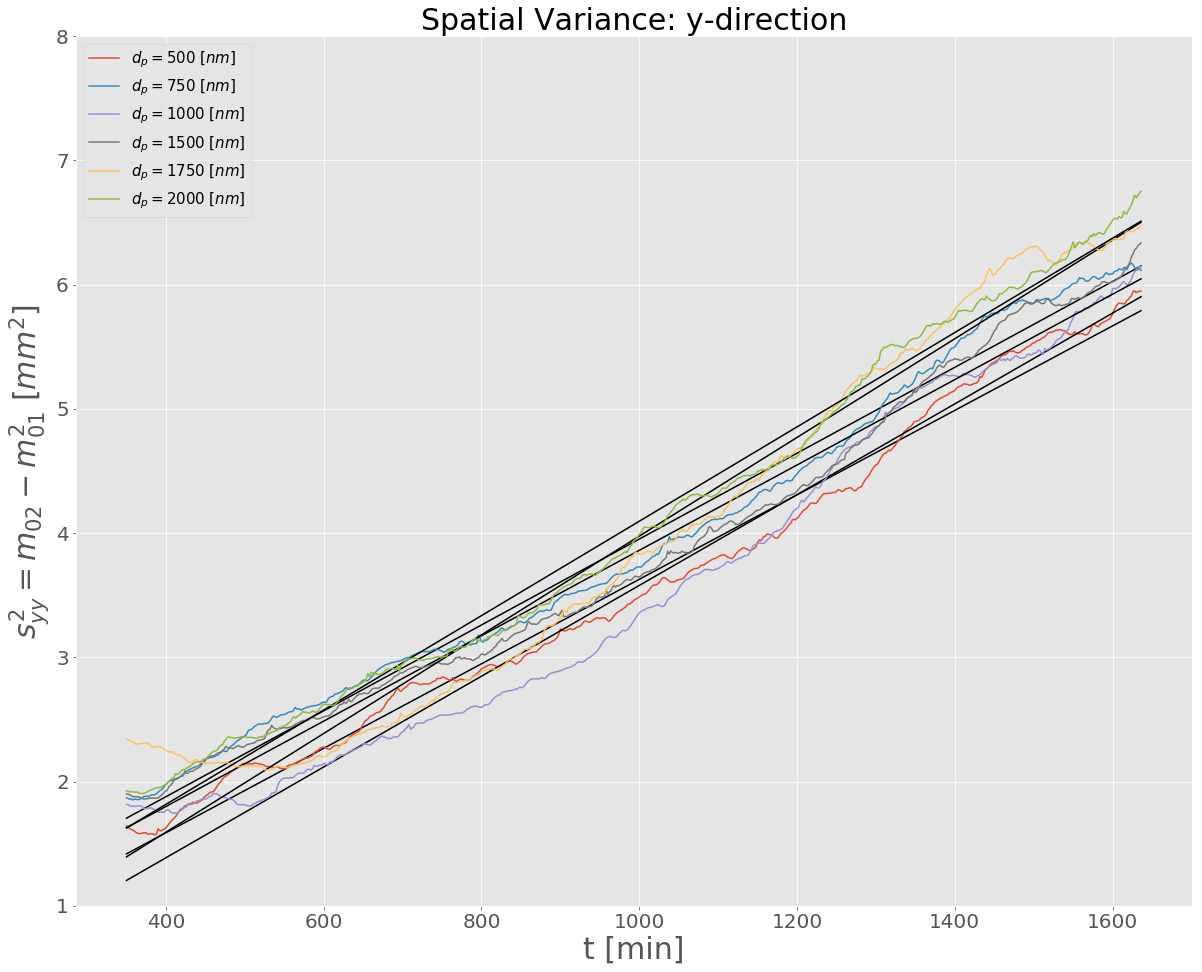

In [64]:
low_time=350
time_limit_ix = 818 

data = da.loc[low_time:da.index[time_limit_ix]]

data.head()

fig, ax = plt.subplots()
fitting = []
for i in da.columns:#range(len(diameters)):
    y = data[i]
    x = data.index
    fit = np.polyfit(x, y, deg=1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=x, y=y)
    print(i, slope,r_value**2)
    ax.plot(x, slope * x +intercept, color='black')
    ax.plot(x,y,label=r'$d_p=$'+i+r' $[nm]$')
    fitting.append([slope, intercept])
plt.legend(fontsize=15)
ymin=1
ymax=8
xmin=low_time
xmax=da.index[time_limit_ix]
plt.ylim(ymin,ymax)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('t [min]', fontsize=30)
plt.ylabel(r'$s^{2}_{yy}=m_{02}-m_{01}^2$ $[mm^2]$', fontsize=30)
plt.title('Spatial Variance: y-direction', fontsize=30)

In [65]:
params = np.array(fitting)
params[:,0] = params[:,0]/2
params

array([[ 0.00169982,  0.22796671],
       [ 0.00172803,  0.49553436],
       [ 0.00182653, -0.07458211],
       [ 0.00171796,  0.42477819],
       [ 0.00198568,  0.0038882 ],
       [ 0.00189877,  0.29740876]])

Text(500,0.00195,u'$D_{yy}$$=1.43368532373e-07*d_p+0.00163025494357$')

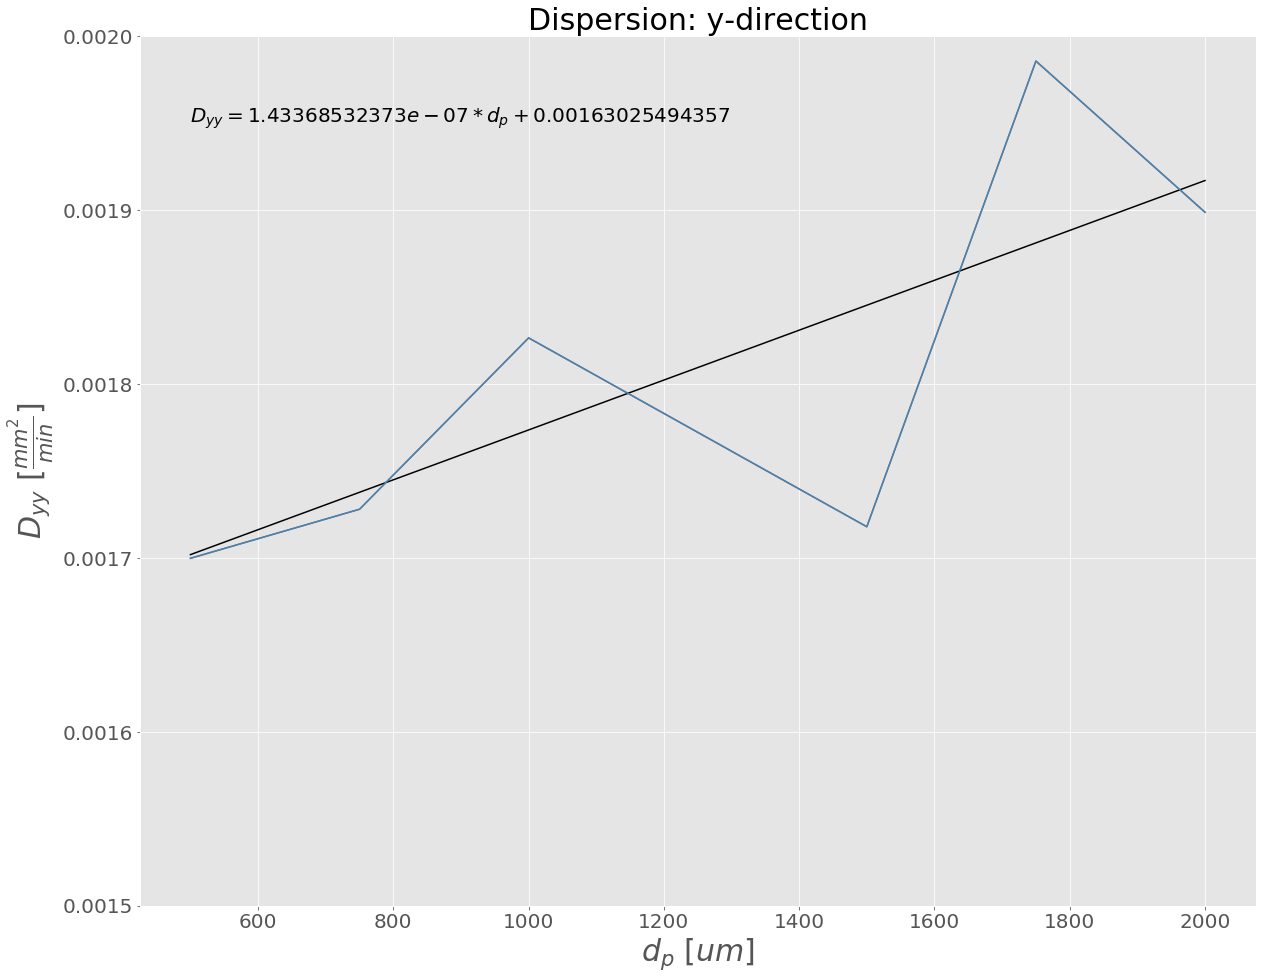

In [66]:
fig, ax = plt.subplots()

x = data.columns.astype(int)
y = params[:,0]
plt.plot(x, y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=x,y=y)
plt.plot(x, slope * x +intercept, color='black')
plt.plot(x,y)
plt.legend(fontsize=15)
ymin=0.0015
ymax=0.002
plt.ylim(ymin,ymax)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel(r'$D_{yy}$ $[\frac{mm^2}{min}]$', fontsize=30)
plt.xlabel(r'$d_p$ $[um]$', fontsize=30)
plt.title('Dispersion: y-direction', fontsize=30)
plt.text(500, 0.00195, r'$D_{yy}$'+'$={0}*d_p+{1}$'.format(slope,intercept), fontsize=20)

(0.024, 0.034)

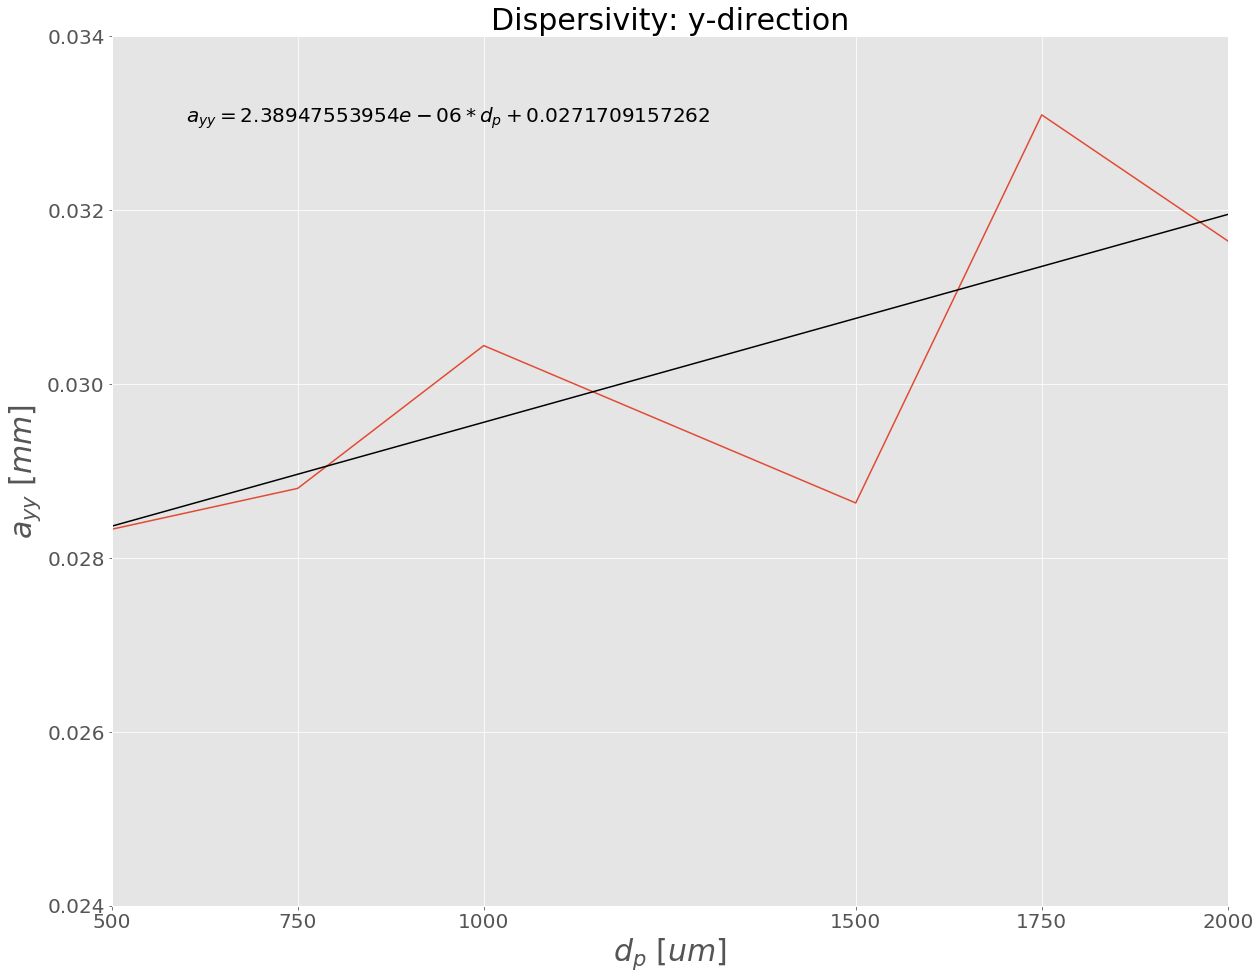

In [67]:
diff = params[:,0] - stokes_einstein(x)

v_av_meters_second =  0.000001 # m/s 
n=1
v_av_millimeters_minite = v_av_meters_second*60*1000
a_y = diff/(v_av_millimeters_minite)**n

fig, ax = plt.subplots()
sns.tsplot(data=a_y,time=x, err_style="ci_bars")
fit = np.polyfit(x, a_y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='black')
plt.text(600, 0.033, r'$a_{yy}=$'+r'${0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel(r'$d_p$ $[um]$', fontsize=30)
plt.ylabel(r'$a_{yy}$ $[mm]$', fontsize=30)
plt.xticks(x);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Dispersivity: y-direction', fontsize=30)
plt.ylim(0.024,0.034)

# TESTING

In [81]:
sigma_x2_v0 = []
for f in range(len(files_2x)):
    m2x = pd.read_csv(files_2x[f], index_col=0).mean(axis=1)
    m1x = pd.read_csv(files_1x[f], index_col=0).mean(axis=1)
    sigma_x2_v0.append(m2x-m1x**2)

In [86]:
m2x = pd.read_csv(files_2x[f], index_col=0)
m1x = pd.read_csv(files_1x[f], index_col=0)

In [87]:
files_2x[f]

'/Users/georgepamfilis/Desktop/THESIS/comsol_project/DATA/micromodel/data_v1/m2x/xy_750.txt'

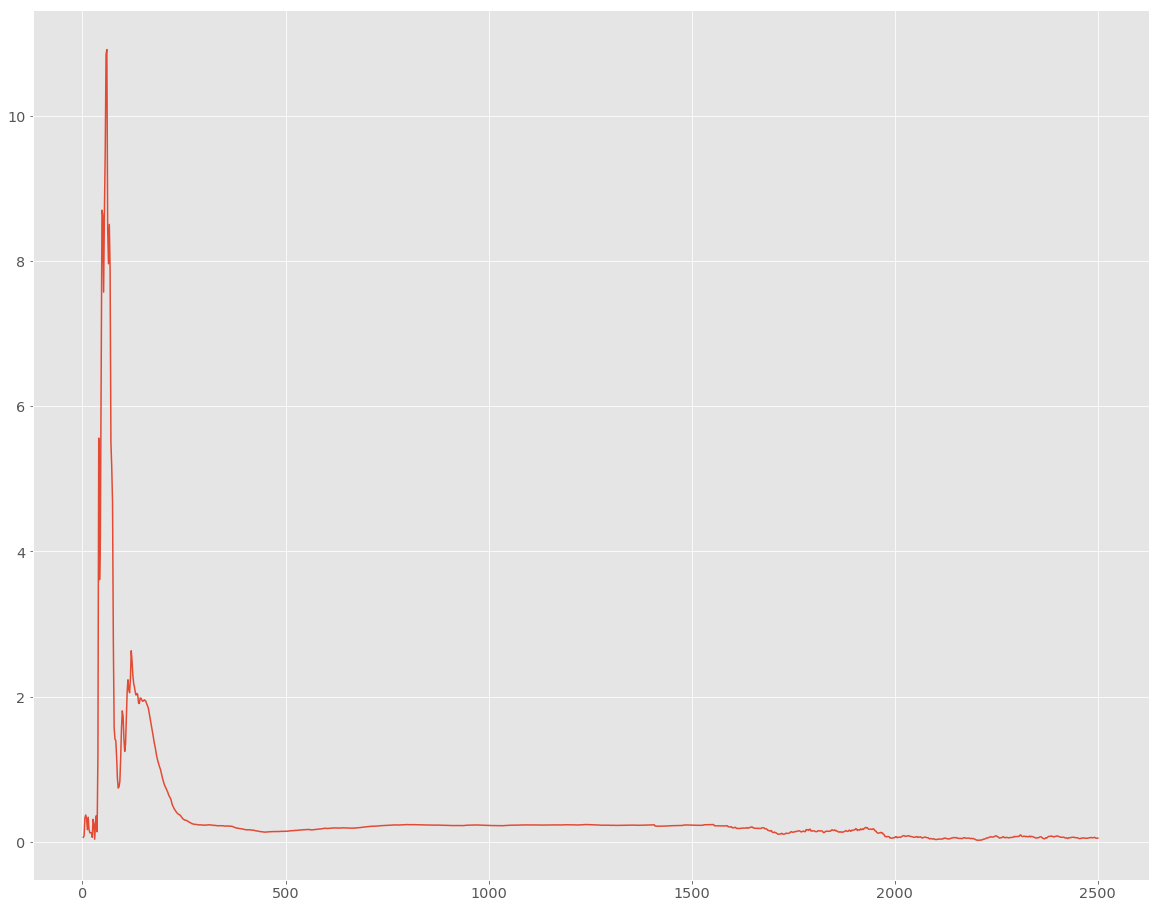

In [91]:
((sigma_x2_v0[7] - (m2x-m1x**2).mean(axis=1))/sigma_x2_v0[7]*100).plot()

In [84]:
sigma_x2_v0[7]

0       0.000000e+00
2       7.160819e-08
4       2.138166e-07
6       2.267595e-07
8       1.938948e-07
10      1.381092e-07
12      2.369203e-07
14      1.695217e-07
16      9.873438e-08
18      3.271326e-06
20      1.443830e-05
22      1.609408e-05
24      5.076854e-04
26      7.128236e-03
28      2.261314e-02
30      1.865222e-02
32      1.053201e-02
34      1.125063e-02
36      2.878892e-02
38      5.431862e-02
40      1.295450e-01
42      1.671716e-01
44      1.190451e-01
46      1.330546e-01
48      1.766298e-01
50      1.805904e-01
52      1.369582e-01
54      1.246185e-01
56      1.468372e-01
58      1.750022e-01
            ...     
2442    5.134709e+03
2444    5.141466e+03
2446    5.148414e+03
2448    5.155096e+03
2450    5.162214e+03
2452    5.169272e+03
2454    5.176542e+03
2456    5.183001e+03
2458    5.189935e+03
2460    5.196319e+03
2462    5.203108e+03
2464    5.209391e+03
2466    5.215699e+03
2468    5.222200e+03
2470    5.228843e+03
2472    5.235469e+03
2474    5.241

In [85]:
(m2x-m1x**2).mean(axis=1)

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

# COMPUTE DISPERSIONS